In [7]:
library('tidyverse')
library('rvest')
library('lubridate')
library('ggrepel')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

In [2]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

In [3]:
df.marathon %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

In [4]:
df.label = df.marathon %>% 
    filter(country.simple %in% c('United States', 'Japan', 'Kenya', 'Ethiopia')) %>%
    group_by(MF, country.simple) %>%
    summarize(median.year = median(year), median.time = median(race.time))

df.label

MF,country.simple,median.year,median.time
<chr>,<chr>,<dbl>,<dbl>
Men's,Ethiopia,2011.0,2.163750
Men's,Japan,1966.0,2.275833
Men's,Kenya,2001.0,2.155139
Men's,United States,1927.5,2.478889
Women's,Ethiopia,2009.0,2.407778
Women's,Kenya,2007.5,2.411389
Women's,United States,1977.5,2.766944


In [18]:
# Display order of levels
factor(df.label $country.simple) %>% levels

[1] "Ethiopia"      "Japan"         "Kenya"         "United States"

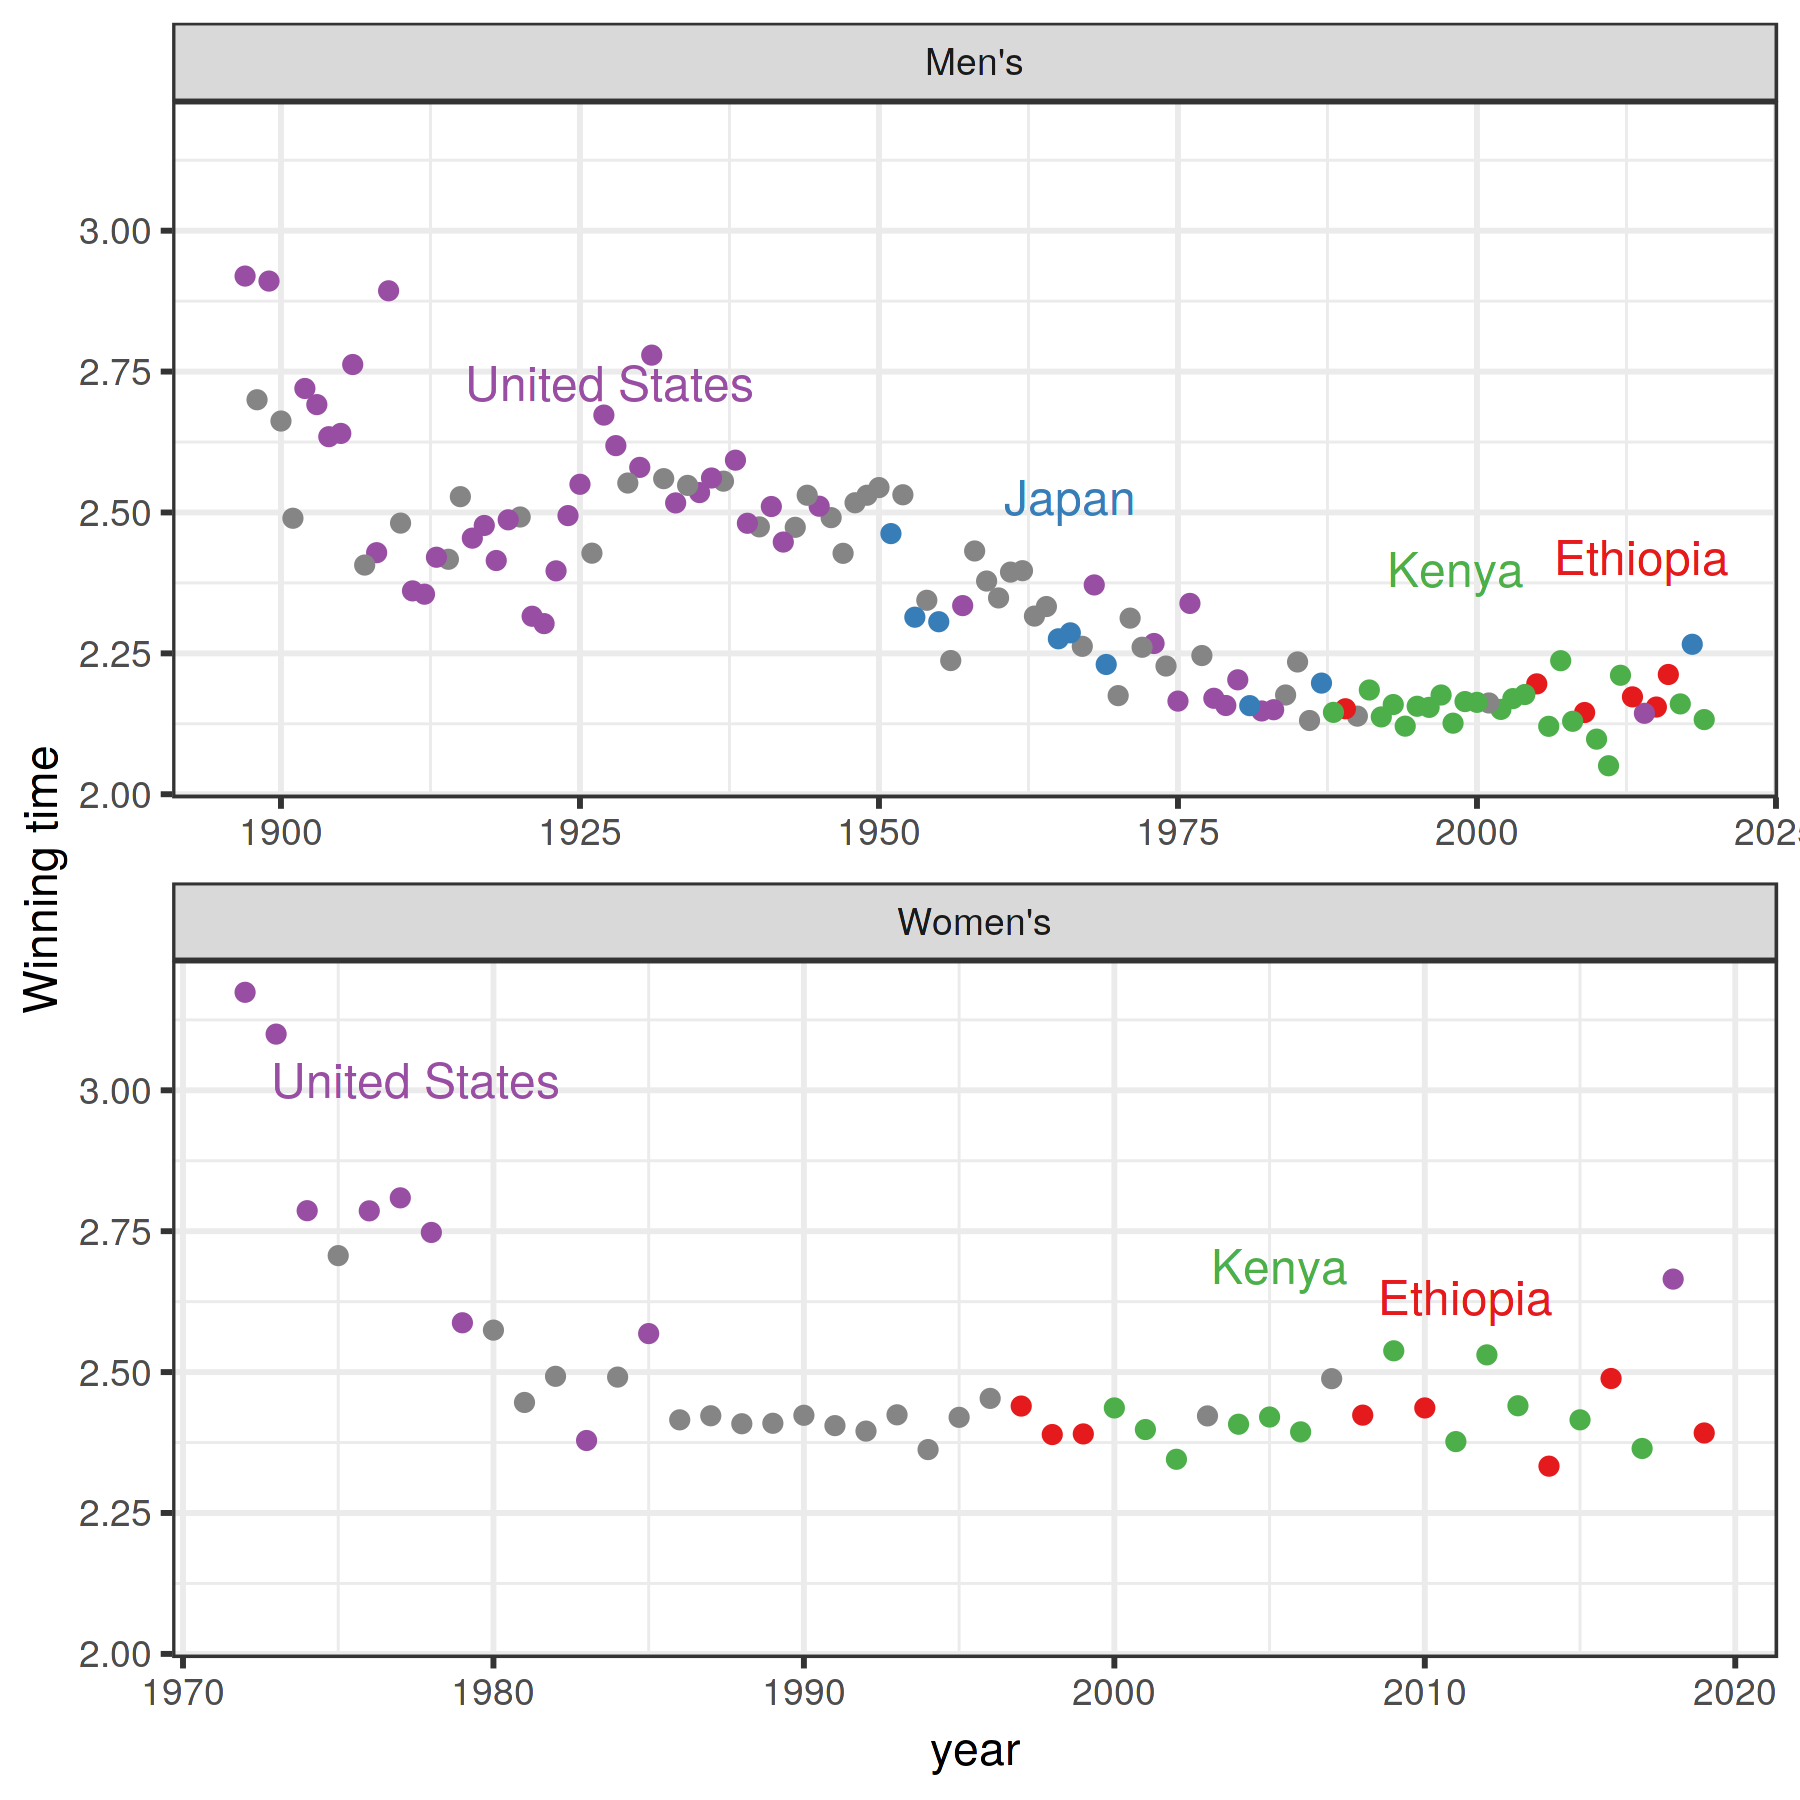

In [24]:
p = ggplot(df.marathon, aes(x = year, y = race.time, color = country.simple))

p = p + geom_point()

p = p + facet_wrap(~ MF, ncol = 1, scales = 'free_x')

p = p + theme_bw()

p = p + theme(legend.position = 'none',
              strip.border = element_blank())

p = p + geom_text_repel(data=df.label,
                        segment.color = 'grey20',
                        segment.size = 0,
                        aes(x = median.year, y = median.time, label = country.simple),
                        size = 4,
                        nudge_y = 0.25)

#use colorbrewer to pick up color schemescolor schemes
#can also use colorbrewer function ie Dark2, Accent,Pastel2,Set1   scale_colour_brewer(palette="Set1")
p = p + scale_color_manual(values = c('#e41a1c',
                                      '#377eb8',
                                      '#4daf4a',
                                      '#858585',
                                      '#984ea3'))

p = p + labs(y='Winning time', x= 'year')

p

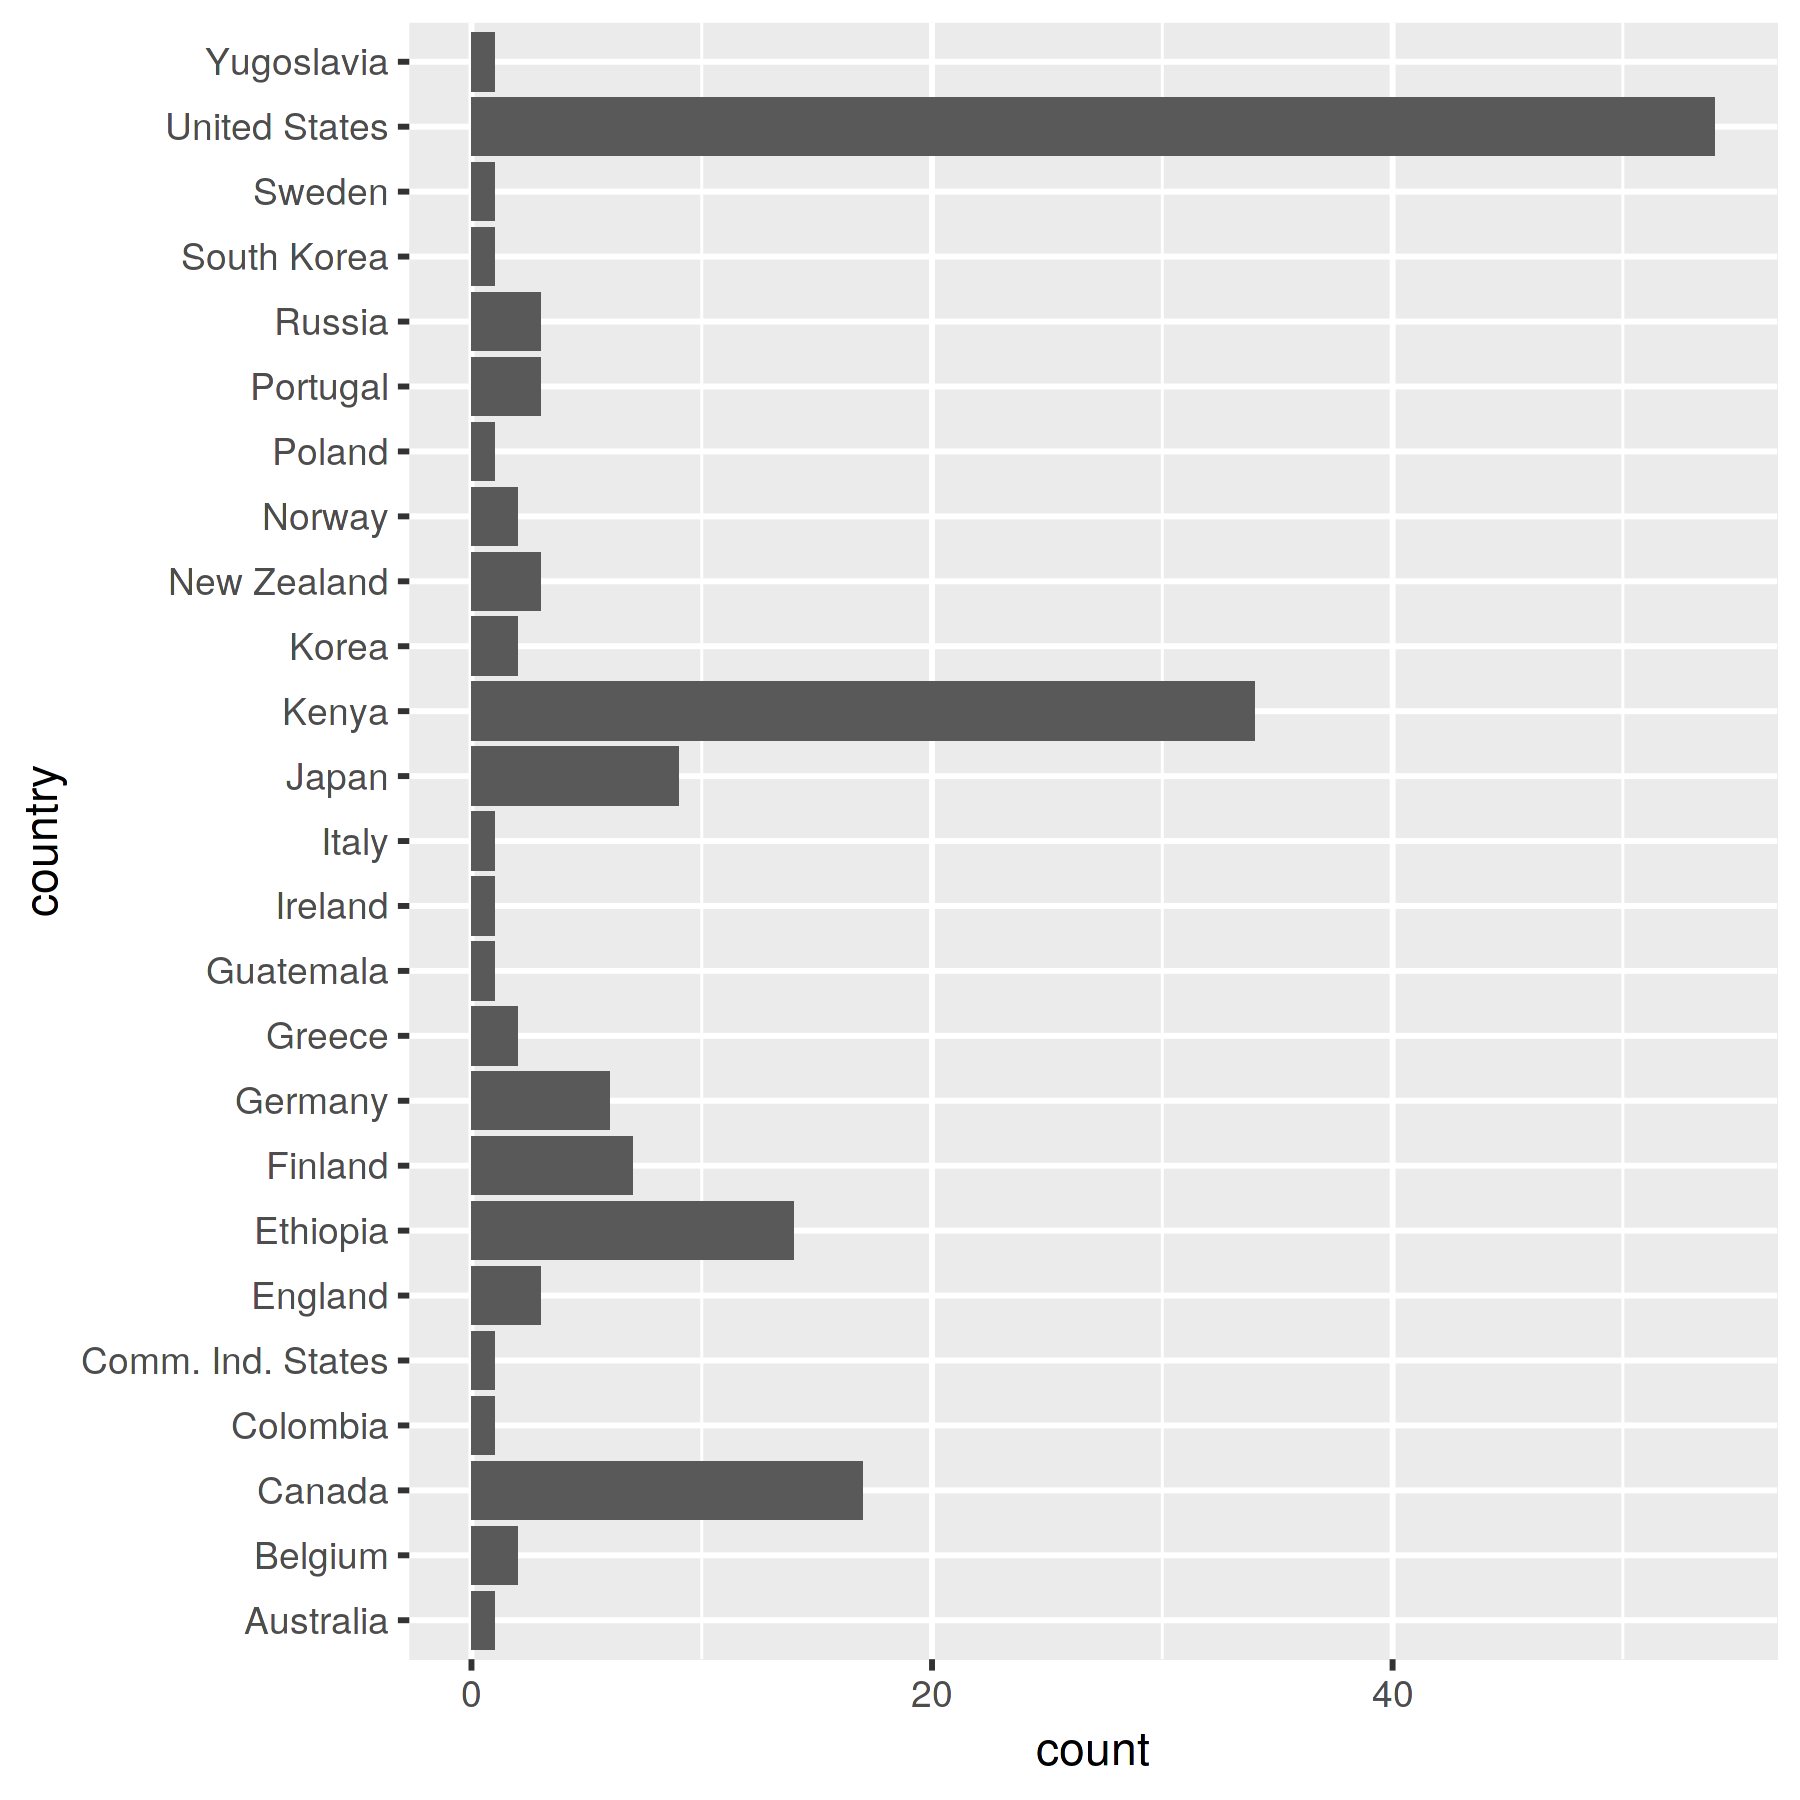

In [10]:
p = ggplot(df.marathon, aes(x = country))

p = p + geom_bar()

p = p + coord_flip()

p

Preview the data (i.e. `df.marathon`).

In [25]:
df.marathon %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | race.time |
| color | ? |
| facet value | ? |

Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

Code your version of the chart below.

What else might you visualize with this data? (e.g. What about totaling the winners from each country?)